# Solution - Assessment 2

## DRW & UofC Quant Foundations
### Summer 2025
#### Mark Hendricks
#### hendricks@uchicago.edu

***

### Points

| Section | Description               | Points |
|:-------:|:--------------------------|:------:|
| 1       | Ordinary Least Squares    | 35     |
| 2       | GARCH                     | 30     |
| 3       | Forecasting Regressions   | 35     |
|Total||100|

All numbered problems are worth 5pts unless otherwise noted.


### Data
The exam makes use of data found in
`data/exam_2_data.xlsx`

***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
returns = pd.read_excel('../data/exam_2_data.xlsx', index_col=0, parse_dates=True)
returns

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP
date,,,,,,,,,,,
2016-01-31,-0.049787,-0.055177,-0.050326,-0.085551,-0.014055,-0.016009,-0.043413,-0.041023,0.033336,0.002905,0.015682
2016-02-29,-0.000826,-0.033345,-0.008178,-0.016632,0.003564,0.014968,-0.002347,-0.007500,0.014860,0.033024,0.012208
2016-03-31,0.067266,0.065821,0.129617,0.101869,0.023437,0.025470,0.042353,0.102551,-0.000662,0.042064,0.016672
2016-04-30,0.003941,0.022218,0.004088,0.007760,0.008328,0.031226,0.097065,-0.016697,-0.001561,0.015249,0.002093
2016-05-31,0.017012,-0.000856,-0.036929,0.014437,-0.003441,0.001701,0.008916,0.022074,-0.000992,-0.026860,-0.006441
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,-0.024060,-0.029502,-0.016967,-0.051399,-0.015700,-0.007803,0.017227,-0.082892,-0.022584,-0.033754,-0.017144
2025-01-31,0.026856,0.048009,0.021521,0.067995,0.016237,0.013605,0.027596,0.018913,0.006166,0.000935,0.013702
2025-02-28,-0.012695,0.029531,0.011470,-0.040107,-0.005952,0.009703,0.001366,0.037861,0.027997,0.013991,0.021572


$$\renewcommand{\targ}{\text{HYG}}$$
$$\renewcommand{\dep}{\text{IEF}}$$
$$\renewcommand{\depsec}{\text{SPY}}$$

---
# 1. OLS

---
### 1.1 
Use OLS to estimate the regression of $\targ$ on $\dep$.

$$r^{\targ}_t = \alpha + \beta^{\dep}r^{\dep}_t + \epsilon_t$$

Report the estimate for $\beta^{\dep}$ and the r-squared.



In [4]:
X = returns['IEF']
Y = returns['HYG']
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(Y, X).fit()  # Fit the Ordinary Least Squares model
print(model.summary())
print('\n')
print(f"R-squared: {model.rsquared:.4f}")
print(f"Beta^IEF : {model.params['IEF']:.4f}")

                            OLS Regression Results                            
Dep. Variable:                    HYG   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     12.60
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           0.000568
Time:                        01:09:31   Log-Likelihood:                 274.80
No. Observations:                 112   AIC:                            -545.6
Df Residuals:                     110   BIC:                            -540.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.002      1.980      0.0

---
### 1.2.
Based on this estimation, explain whether $\targ$ returns are sensitive to $\dep$.


HYG returns are sensitive to IEF returns. This is shown by the small p-value of 0.001, which is statistically significant at the 5% level. About 10% of the variation in HYG is explained by IEF

---
### 1.3. 

Consider a multivariable regression of $\targ$ on both $\dep$ and $\depsec$.

$$r^{\targ}_t = \alpha + \beta^{\dep}r_t^{\dep} + \beta^{\depsec}r_t^{\depsec} + \epsilon$$

Report the estimate for $\beta^{\dep}$ and the r-squared.


In [5]:
X = returns[['IEF', 'SPY']]
Y = returns['HYG']
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(Y, X).fit()  # Fit the Ordinary Least Squares model
print(model.summary())

print(f"R-squared: {model.rsquared:.4f}")
print(f"Beta^IEF : {model.params['IEF']:.4f}")

                            OLS Regression Results                            
Dep. Variable:                    HYG   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     130.7
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           1.12e-29
Time:                        01:09:31   Log-Likelihood:                 337.22
No. Observations:                 112   AIC:                            -668.4
Df Residuals:                     109   BIC:                            -660.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.299      0.7

---
### 1.4. 
Report the correlation matrix of $\targ, \dep, \depsec$.


In [6]:
corr_matrix = returns[['HYG', 'IEF', 'SPY']].corr()
print(corr_matrix)

          HYG       IEF       SPY
HYG  1.000000  0.320608  0.815277
IEF  0.320608  1.000000  0.147579
SPY  0.815277  0.147579  1.000000


---
### 1.5. 
Discuss why the estimated $\beta^{\dep}$ changed from the univariate regression versus the multivariate regression.


$\beta^{IEF}$ decreased from 0.36 to 0.23 from the univariate to the multivariate regression. This was accompanied by an increase in R^2 from 0.1 to 0.7. We can interpret this as more of the variance in HYG being explained by SPY, so the weighting towards IEF decreased when SPY was introduced to the regression. This is complimented by the above printed correlation matrix, showing a 80% correlation between SPY and HYG and a 30% correlation between IEF and HYG.

---
### 1.6. (10pts)
Do the following estimates depend on normality?
* alpha
* beta
* r-squared
* t-stats

Alpha, Beta, r-squared do not depend on normality. The calculation of the T-stat also does not depend on normality, however the interpretation of this statistic (p-value) does. For large enough datasets, Central Limit Theorem allows us to relax this requirement even if the data is not normally distributed.

***

# 2. Time-series Considerations

Forecast the next-month volatility of the return of $\targ$ using each of the following methods:
* expanding window (with minimum of 24 months)
* rolling window (24 months)
* EWMA (weight of .97)
* GARCH(1,1)

Note that...
* the `expanding window` method is simply the standard deviation calculation using all data up to $t$ to predict variance or volatility at $t+1$. Using pandas, try `.expanding(24).std()`.
* you should annualize these volatility forecasts by scaling by $\sqrt{12}$.
---




In [7]:
hyg = returns['HYG']
var = pd.DataFrame(index=hyg.index, columns=['expanding', 'rolling', 'ewma', 'garch'])

In [8]:
hyg_2 = hyg ** 2
var['expanding'] = hyg_2.expanding(min_periods=24).mean().shift(1)

var['rolling'] = hyg_2.rolling(24).mean().shift(1)

In [9]:
theta = 0.97
var.iloc[0, 2] = hyg_2.iloc[0]
for i in range(1, len(hyg)):
    var.iloc[i, 2] = theta * var.iloc[i - 1, 2] + (1-theta) * hyg_2.iloc[i-1]

In [10]:
import arch

GARCH = arch.arch_model(hyg, vol='GARCH', p=1, q=1, o = 0, dist='Normal')
GARCH_model = GARCH.fit()
GARCH_model.params

Iteration:      1,   Func. Count:      6,   Neg. LLF: 288824520.50270975
Iteration:      2,   Func. Count:     16,   Neg. LLF: -278.5996440836626
Optimization terminated successfully    (Exit mode 0)
            Current function value: -278.59964425443803
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


c:\SandBox\drw-prework-2025\.venv\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004825. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


mu          0.005437
omega       0.000145
alpha[1]    0.200003
beta[1]     0.499998
Name: params, dtype: float64

In [11]:
var.iloc[0, 3] = hyg_2.iloc[0]
for i in range(1, len(var)):
    var.iloc[i, 3] = GARCH_model.params['omega'] + var.iloc[i-1, 3] * GARCH_model.params['beta[1]'] + GARCH_model.params['alpha[1]']*(hyg_2.iloc[i-1])

In [12]:
var.dropna(inplace=True)
vol = (var * 12)**.5
vol

,expanding,rolling,ewma,garch
date,,,,
2018-01-31,0.045796,0.045796,0.0489,0.059392
2018-02-28,0.044872,0.044376,0.048162,0.059171
2018-03-31,0.044394,0.043530,0.047718,0.060565
2018-04-30,0.043591,0.039663,0.047018,0.059866
2018-05-31,0.042921,0.033123,0.046396,0.059868
...,...,...,...,...
2024-12-31,0.079012,0.065896,0.081763,0.067054
2025-01-31,0.078688,0.064949,0.080663,0.064274
2025-02-28,0.078456,0.060321,0.079862,0.065167


---
### 2.1. (10pts) 
Plot the time series of volatility forecasts using each of the four methods.


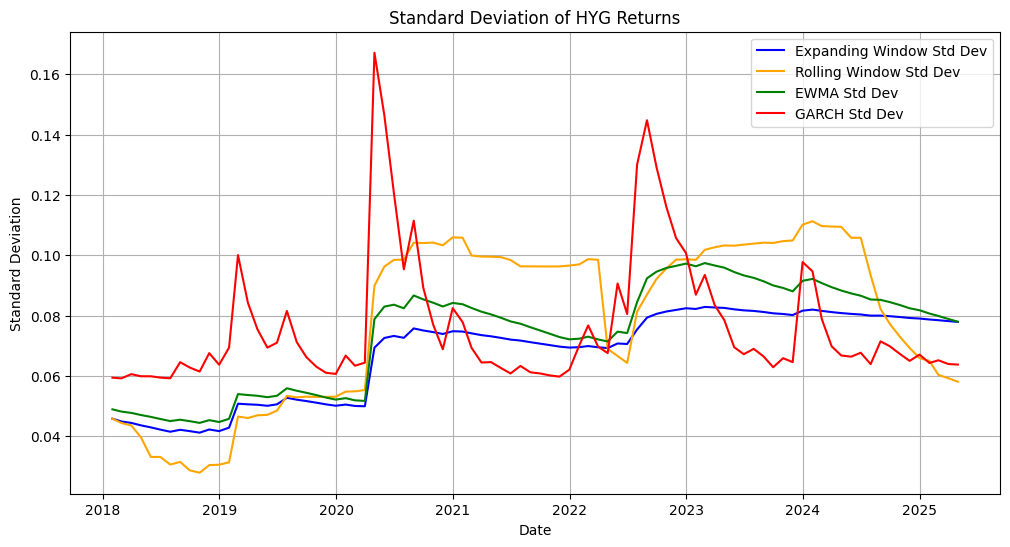

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(vol['expanding'], label='Expanding Window Std Dev', color='blue')
plt.plot(vol['rolling'], label='Rolling Window Std Dev', color='orange')
plt.plot(vol['ewma'], label='EWMA Std Dev', color='green')
plt.plot(vol['garch'], label='GARCH Std Dev', color='red')
plt.title('Standard Deviation of HYG Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid()
plt.show()

---
### 2.2 (10pts)
Report the volatility forecast (from all four methods) for `April 2020` and `April 2025`.


In [14]:
print(f'Vol on 2020-04-30:')
print(vol.loc["2020-04-30"])

Vol on 2020-04-30:
expanding    0.069346
rolling      0.089896
ewma         0.078811
garch        0.167164
Name: 2020-04-30 00:00:00, dtype: object


In [15]:
print(f'Vol on 2025-04-30:')
print(vol.loc["2025-04-30"])

Vol on 2025-04-30:
expanding    0.077893
rolling      0.058052
ewma         0.077951
garch        0.063743
Name: 2025-04-30 00:00:00, dtype: object


---
### 2.3.
Report the GARCH forecast of volatility in `May 2025` using the data through `April 2025`.

In [ ]:
vol.tail()

,expanding,rolling,ewma,garch
date,,,,
2024-12-31,0.000520,0.000362,0.000557,0.000375
2025-01-31,0.000516,0.000352,0.000542,0.000344
2025-02-28,0.000513,0.000303,0.000532,0.000354
2025-03-31,0.000509,0.000292,0.000518,0.000341
2025-04-30,0.000506,0.000281,0.000506,0.000339


In [17]:
var_may_25 = GARCH_model.params['omega'] + GARCH_model.params['beta[1]'] * var['garch'].iloc[-1] + GARCH_model.params['alpha[1]'] * hyg_2.iloc[-1]
print(f'Variance on 2025-05-25: {var_may_25:.4f}')
print(f'Vol on 2025-05-25: {np.sqrt(var_may_25) * np.sqrt(12):.4f}')

Variance on 2025-05-25: 0.0003
Vol on 2025-05-25: 0.0614


---
### 2.4.

Which of the following regressions (with monthly data) would concern you in terms of model validity?

* time-$t$ prices on time-$t$ prices
* time-$t$ returns on time-$t$ returns
* time-$t$ prices on time-$t-1$ prices
* time-$t$ returns on time-$t-1$ returns

The first two regressions could only be used to look at correlation between prices/returns, these could not be used for predictions. The last two regressions are used for prediction power. 

Price data is often non-stationary, these could lead to concerns about the results of the regression, and is something that should be noted (spurious regression). Returns however, are often stationary, and the results of the regression are then more easily accepted.

***

# 3. Forecasting Regressions

### 3.1.

Forecast $\targ$ with an autogression, using OLS. (That is, the regressor is a lag of the target.)

$$r^{\targ}_t = \alpha + \beta r^{\targ}_{t-1} + \epsilon_{t-1}$$

Report the r-squared and $\beta$ estimates.



In [25]:
X = returns['HYG'].shift(1).iloc[1:]
Y = returns['HYG'].iloc[1:]  
X = sm.add_constant(X)  


model = sm.OLS(Y, X).fit()  # Fit the Ordinary Least Squares model
print(model.summary())
print(f"R-squared: {model.rsquared:.4f}")
print(f"Beta^HYG : {model.params['HYG']:.4f}")


                            OLS Regression Results                            
Dep. Variable:                    HYG   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.340
Date:                Mon, 30 Jun 2025   Prob (F-statistic):             0.0227
Time:                        01:22:46   Log-Likelihood:                 268.91
No. Observations:                 111   AIC:                            -533.8
Df Residuals:                     109   BIC:                            -528.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.002      2.593      0.0

---
### 3.2.
Plot the sample residuals across time.

Do the sample residuals show signs of autoregression? 


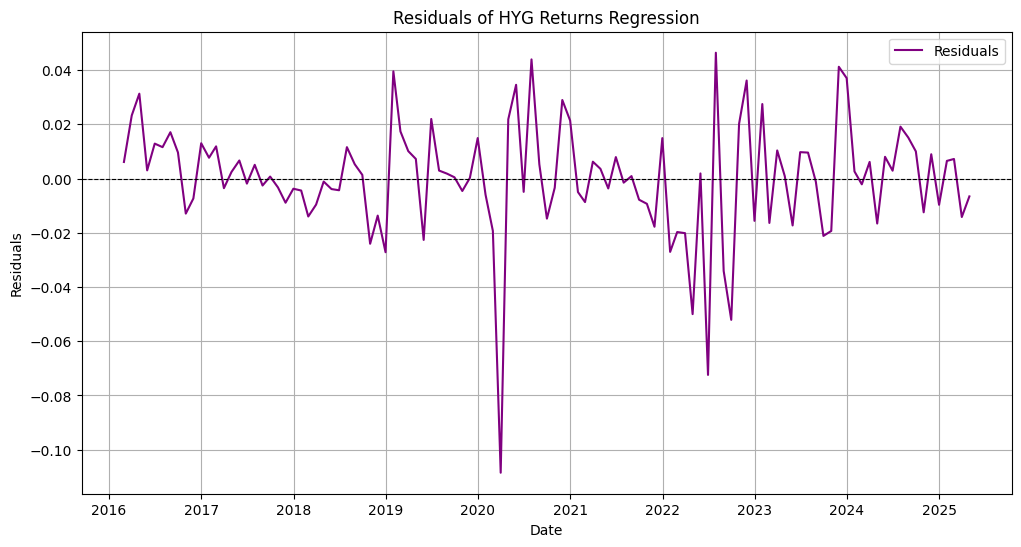

In [26]:
residuals = model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.title('Residuals of HYG Returns Regression')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()

The residuals do not visually show signs of autoregression

---
### 3.3.
Would autoregression of the residuals be a problem for our estimates of any of the following?
* beta
* r-squared
* t-stat


There is no problem for beta and r-squared. T-stat will have a problem because the standard errors of the coefficients are not correct, therefore t-stat will be wrong.

---
### 3.4.
Forecast `SPY` with the lagged values of all instruments in the data set.

$$r^{\text{SPY}}_t = \alpha + \beta \boldsymbol{r}_{t-1} + \epsilon_{t-1}$$

where $\boldsymbol{r}$ is the vector of all returns.

Report the r-squared.


In [ ]:
X = returns.drop(columns=['SPY']).shift(1).iloc[1:]
Y = returns['SPY'].iloc[1:]
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(Y, X).fit()  # Fit the Ordinary Least Squares model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.8094
Date:                Mon, 30 Jun 2025   Prob (F-statistic):              0.620
Time:                        01:30:07   Log-Likelihood:                 193.12
No. Observations:                 111   AIC:                            -364.2
Df Residuals:                     100   BIC:                            -334.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0150      0.005      3.286      0.0

In [28]:
print(f"R-squared: {model.rsquared:.4f}")

R-squared: 0.0749


---
### 3.5. 
Are any of the t-stats from the previous multivariate regression greater than 2 in absolute value?


The constant term is the only term with a t-stat greater than 2 in absolute value, none of the other terms have this.

---
### 3.6.
Do you think this forecast would perform well?


No, all of the coefficients have high standard errors, and no statistical significance. 

---
### 3.7.
Report the matrix condition number or the determinant of $\boldsymbol{R}'\boldsymbol{R}$. What do you conclude?

The condition number is 226, therefore we can conclude that there is strong multicolinearity within our regression, which increases the standard errors of coefficients. We could try to fix this by removing highly correlated regressors.

***